<a href="https://colab.research.google.com/github/assi213/assi2131/blob/main/HHV32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import MinMaxScaler
import seaborn as sns
import numpy as np

In [64]:
# Normalisation des données avec MinMaxScaler pour avoir des valeurs entre 0 et 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [230]:
# Charger les données
# Remplacez 'data.csv' par le chemin de votre fichier de données
df = pd.read_excel('simplein.xlsx')
df=df.dropna()
df

,%C,%H,%N,%S,HHV\n(MJ/kg)
0,-0.285687,0.126736,-0.355330,-0.893443,-0.300737
1,-0.236490,-0.015625,-0.847716,-0.836066,-0.141326
2,-0.238427,-0.020833,-0.847716,-0.819672,-0.141326
3,-0.199690,0.098958,-0.670051,-0.860656,-0.131949
4,-0.358512,-0.050347,0.446701,-0.721311,-0.237776
...,...,...,...,...,...
166,-0.221383,0.059028,-0.690355,-0.737705,-0.149364
167,-0.317838,0.131944,-0.532995,-0.942623,-0.031480
168,-0.253147,-0.112847,-0.939086,-0.803279,-0.150703
169,-0.076893,0.003472,-0.883249,-1.000000,-0.385131


In [231]:
# Séparer les caractéristiques (features) et la cible (target)
# Assurez-vous que les colonnes correspondent à votre dataset
X = df[['%C', '%H', '%N', '%S']]
y = df['HHV\n(MJ/kg)']

In [232]:
# Encoder les variables catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)

In [233]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [234]:
# Créer le modèle de forêt aléatoire
model = RandomForestRegressor(n_estimators=1000, random_state=40)


In [235]:
# Entraîner le modèle
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=40)

In [236]:
# Faire des prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [237]:
# Évaluer le modèle sur l'ensemble d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

print("Sur l'ensemble d'entraînement :")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared: {r2_train}")
print(f"Root Mean Square Error: {rmse_train}")

Sur l'ensemble d'entraînement :
Mean Squared Error: 0.009199463707603819
Mean Absolute Error: 0.05999073125566345
R-squared: 0.8646156829779039
Root Mean Square Error: 0.09591383480814339


In [241]:
# Évaluer le modèle sur l'ensemble de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("\nPour l'ensemble de test :")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared: {r2_test}")
print(f"Root Mean Square Error: {rmse_test}")


Pour l'ensemble de test :
Mean Squared Error: 0.05652429862718518
Mean Absolute Error: 0.15946030044971762
R-squared: 0.2898632309345086
Root Mean Square Error: 0.23774839353229116


In [242]:
# Enregistrer les prédictions dans un DataFrame
results_df = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites': y_test_pred
})

# Exporter les résultats vers un fichier Excel
results_df.to_excel('predictions_result.xlsx', index=False)

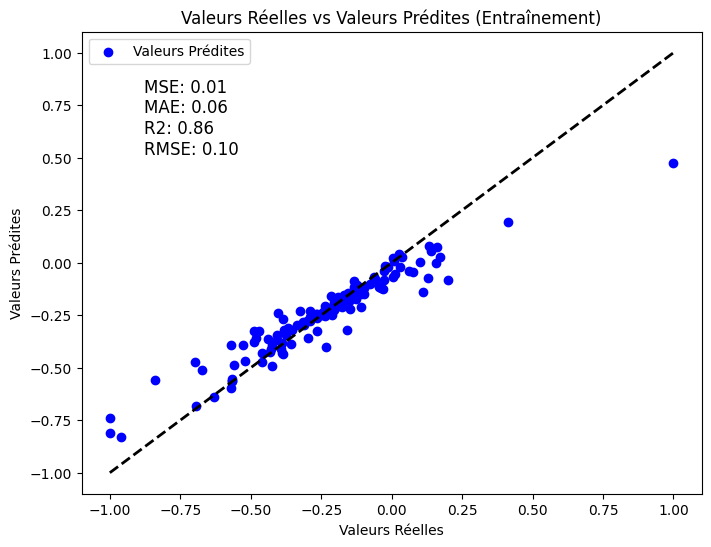

In [243]:
# Visualiser les résultats pour l'ensemble d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Valeurs Prédites')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites (Entraînement)')
plt.text(0.1, 0.9, f'MSE: {mse_train:.2f}\nMAE: {mae_train:.2f}\nR2: {r2_train:.2f}\nRMSE: {rmse_train:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.legend()
plt.show()



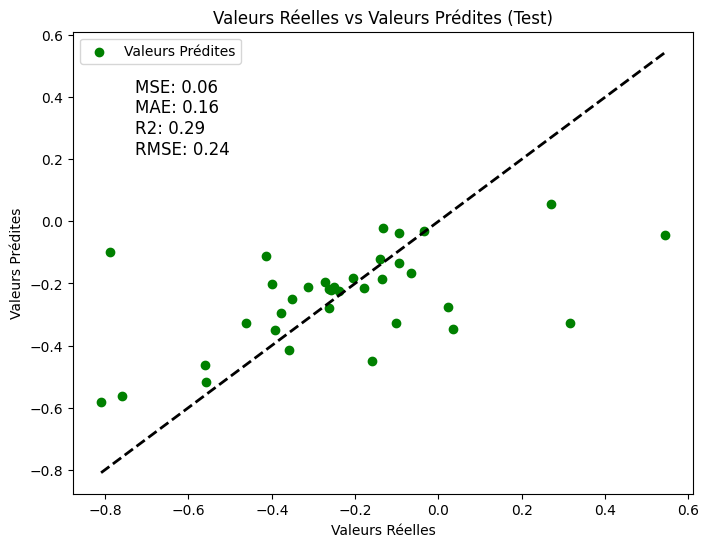

In [244]:
# Visualiser les résultats pour l'ensemble de test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Valeurs Prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites (Test)')
plt.text(0.1, 0.9, f'MSE: {mse_test:.2f}\nMAE: {mae_test:.2f}\nR2: {r2_test:.2f}\nRMSE: {rmse_test:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.legend()
plt.show()



In [245]:
importances = model.feature_importances_
feature_names = X.columns

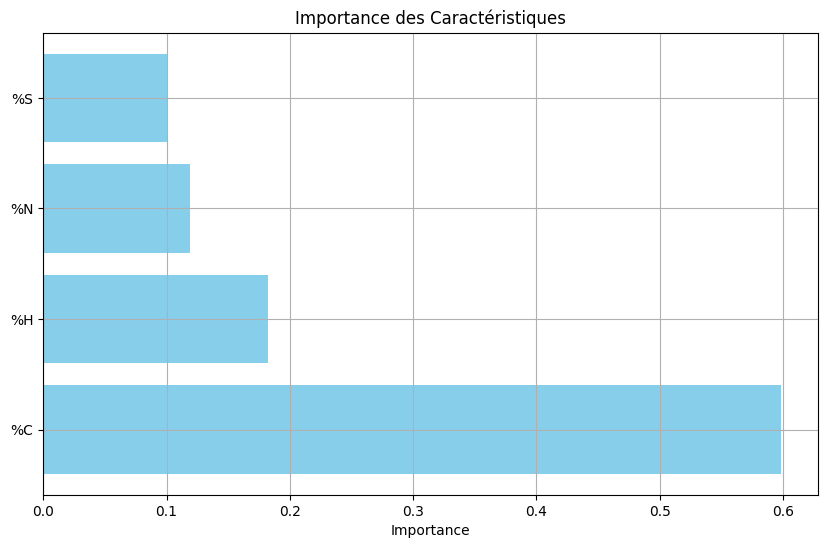

In [246]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Caractéristiques')
plt.grid(True)
plt.show()


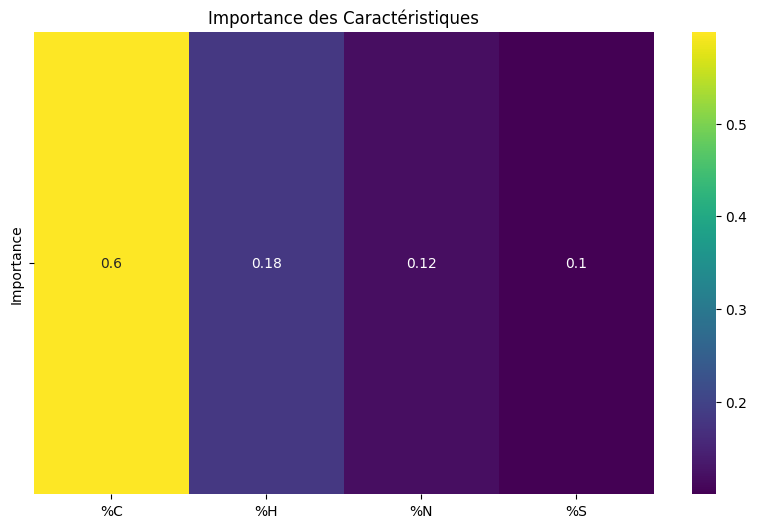

In [247]:
# Assuming 'importances' and 'feature_names' are available from previous cells
# Create the DataFrame for feature importances, setting the index to 'Feature'
importance_df = pd.DataFrame({'Importance': importances}, index=feature_names)

# Tracer l'importance des caractéristiques avec une carte de chaleur
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df.T, annot=True, cmap='viridis')
plt.title('Importance des Caractéristiques')
plt.show()